In [28]:
from copy import copy
import numpy as np
import matplotlib.pyplot as plt
from camera import Camera
from read_form_obj import read_from_obj
from render_triangle import to_homogeneous, rasterize_triangle, show_image

In [29]:
cube = np.array(
        [
            [0, 0, 0], # 0
            [1, 0, 0], # 1
            [1, 1, 0], # 2
            [0, 1, 0], # 3
            [0, 0, 1], # 4
            [1, 0, 1], # 5
            [1, 1, 1], # 6
            [0, 1, 1], # 7
        ])
faces = np.array(
        [
            [0, 1, 2],
            [0, 2, 3],
            [0, 4, 7],
            [0, 7, 3],
            [0, 4, 5],
            [0, 5, 1],
            [1, 5, 2],
            [2, 5, 6],
            [2, 6, 3],
            [3, 7, 6],
            [4, 5, 6],
            [4, 6, 7]

        ])

colors = np.array(
        [
            [1., 0.5, 0.],
            [0., 1., 0.],
            [0., 0., 1.],
            [0., 0., 1.],
            [1., 0., 1.],
            [1., 0., 0.],
            [1., 0.5, 0.],
            [0., 1., 0.],
        ])

In [30]:
camera_position = np.array([-1, -2, 3])
at = np.array([0, 0, 0])
up = np.array([0, -1, 0])
fov = 90
z_near = 0.1
z_far = 100

In [31]:
camera = Camera(camera_position, at, up, fov, z_near, z_far)
cube = cube - np.mean(cube)
cube_homogeneous = to_homogeneous(cube)
projected_cube = camera(cube_homogeneous)
canvas = np.zeros(shape=(512, 512, 3))
z_buffer = np.zeros(shape=(512, 512, 3))
z_buffer.fill(-float("inf"))

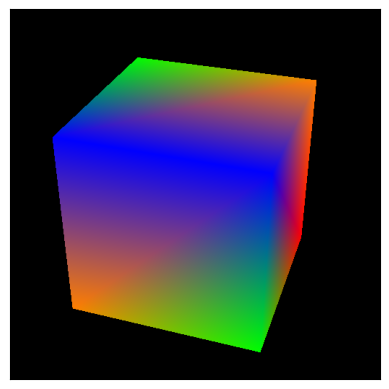

In [32]:
for face in faces:
    to_rasterizer = projected_cube[face] * 10
    color = colors[face]
    canvas, z_buffer = rasterize_triangle(to_rasterizer, colors=color, canvas=canvas, z_buffer=z_buffer)
show_image(canvas)